## 人工智能与无人驾驶技术

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

#

定义图的邻接表结构，表示各节点及其相邻节点的权重

In [24]:
graph = {
    'A': {'B': 6, 'C': 3},
    'B': {'A': 6, 'C': 2, 'D': 5},
    'C': {'A': 3, 'B': 2, 'D': 3, 'E': 4},
    'D': {'B': 5, 'C': 3, 'E': 2, 'F': 3},
    'E': {'C': 4, 'D': 2, 'F': 5},
    'F': {'D': 3, 'E': 5}
}

#

打印出图表，图形可视化

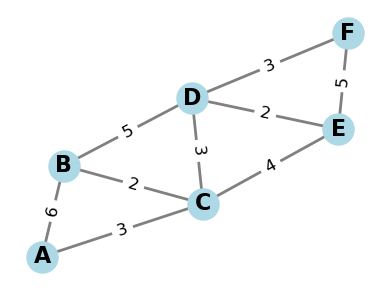

In [28]:
# 创建无向图
G = nx.Graph()

# 添加边
for node in graph:
    for neighbor, weight in graph[node].items():
        if node < neighbor:  # 确保每条边只添加一次
            G.add_edge(node, neighbor, weight=weight)

# 设置图形布局
pos = nx.spring_layout(G, seed=15)  # 使用固定种子保证布局一致性

# 绘制节点和边
plt.figure(figsize=(4, 3))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=2, edge_color='gray')

# 添加标签
nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# 显示图形
plt.axis('off')
plt.tight_layout()
plt.show()

#

迪杰斯特拉算法

In [32]:
def dijkstra(graph, source):
    # 初始化距离字典，所有节点初始为无穷大，源点距离为0
    distances = {node: float('inf') for node in graph}
    distances[source] = 0
    # 记录每个节点的前驱节点，记录到达每个节点的最短路径中的前一个节点，用于最终路径重构
    predecessors = {node: None for node in graph}
    # 记录已找到最短路径的节点集合
    shortest_path_set = set()
    # 图中总节点数，用于控制循环次数
    num_nodes = len(graph)
    
    while len(shortest_path_set) < num_nodes:
        # 在当前未处理的节点中找到距离最小的节点作为处理节点
        current_node = None
        min_distance = float('inf')
        for node in graph:
            if node not in shortest_path_set and distances[node] < min_distance:
                min_distance = distances[node]
                current_node = node
        
        # 若所有剩余节点不可达，提前结束循环
        if current_node is None:
            break
        
        # 将当前节点加入已处理集合
        shortest_path_set.add(current_node)
        
        # 遍历当前节点的所有邻居，更新最短距离和前驱节点
        for neighbor, weight in graph[current_node].items(): # 遍历当前节点的所有邻居，更新其最短距离和前驱节点
            new_distance = distances[current_node] + weight # 计算从源点经过当前节点到达该邻居的新距离
            if new_distance < distances[neighbor]:  # 如果新路径更短，则更新邻居节点的距离和前驱节点
                distances[neighbor] = new_distance
                predecessors[neighbor] = current_node  # 更新前驱节点
    
    return distances, predecessors

#

执行算法并输出结果

In [36]:
# 调用Dijkstra算法获取距离和前驱信息
source_node = 'A'
distances, predecessors = dijkstra(graph, source_node)

# 生成并打印结果
for node in graph:
    if node == source_node:
        continue  # 跳过源点自身
    
    # 通过前驱节点回溯构建路径
    path = []
    current = node
    while current is not None:
        path.append(current)
        current = predecessors[current]
    path = path[::-1]  # 反转路径得到正向顺序
    
    # 检查路径有效性并格式化输出
    if path[0] == source_node:
        path_str = '->'.join(path)
        print(f"{source_node}点到{node}点的最短路径和距离：('{path_str}', {distances[node]})")
    else:
        print(f"{source_node}点到{node}点没有可达路径")

A点到B点的最短路径和距离：('A->C->B', 5)
A点到C点的最短路径和距离：('A->C', 3)
A点到D点的最短路径和距离：('A->C->D', 6)
A点到E点的最短路径和距离：('A->C->E', 7)
A点到F点的最短路径和距离：('A->C->D->F', 9)
